# Quick start `klifs_utils` - work with KLIFS data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [3]:
import klifs_utils as klifs

## Remote data

### Kinases

In [4]:
klifs.remote.kinases.kinase_groups()

['AGC', 'CAMK', 'CK1', 'CMGC', 'Other', 'STE', 'TK', 'TKL']

In [5]:
klifs.remote.kinases.kinase_families(kinase_group='CMGC')

['CDK', 'CDKL', 'CK2', 'CLK', 'DYRK', 'GSK', 'MAPK', 'RCK', 'SRPK']

In [6]:
# Or get all kinase families
len(klifs.remote.kinases.kinase_families())

144

In [7]:
klifs.remote.kinases.kinase_names().head()

,kinase_ID,name,full_name,species
0,813,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
1,815,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
2,814,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
3,531,Aak1,AP2 associated kinase 1,Mouse
4,277,AAK1,AP2 associated kinase 1,Human


In [8]:
klifs.remote.kinases.kinase_from_kinase_name('Aak1')

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...
1,277,AAK1,AAK1,NAK,Other,BIKE,Human,AP2 associated kinase 1,Q2M2I8,1921,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...


In [9]:
klifs.remote.kinases.kinase_from_kinase_ids([533, 531])

,ligand_id,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,533,533,ACK,Tnk2,Ack,TK,,Mouse,"tyrosine kinase, non-receptor, 2",O54967,0,EKLGDGSFGVVRRVAVKCLDFIREVNAMHSLDRNLIRLYGVKMVTE...
0,531,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...


### Ligands

In [10]:
klifs.remote.ligands.ligand_ids(33)

,kinase_id,ligand_ID,PDB-code,Name,SMILES,InChIKey
0,33,920,LW4,3-(1H-indol-3-yl)-4-[2-(4-methylpiperazin-1-yl...,O=C1NC(=O)C(=C1c2nc(nc3c2cccc3)N4CCN(CC4)C)C=5...,OAVGBZOFDPFGPJ-UHFFFAOYSA-N
1,33,921,3KZ,"(1R)-9-[(3S,4S)-1,3-dimethylpiperidin-4-yl]-8-...",Fc1c(c2c(cc3N4C(=NNC(=O)[C@H]4C)COc3c2)[C@@H]5...,BLWOBXIQFDYTRF-OAGGEKHMSA-N


In [11]:
klifs.remote.ligands.structure_ids(ligand_ids=101)

,ligand_id,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,101,298,NEK2,Human,286,2xkd,B,A,0.735,2.066,...,False,False,False,False,False,False,False,False,False,False
1,101,330,NEK2,Human,286,2xkd,A,A,0.735,2.066,...,False,False,False,False,False,False,False,False,False,False


### Interactions

In [12]:
klifs.remote.interactions.interaction_types()

,position,name
0,1,Apolar contact
1,2,Aromatic face-to-face
2,3,Aromatic edge-to-face
3,4,Hydrogen bond donor (protein)
4,5,Hydrogen bond acceptor (protein)
5,6,Protein cation - ligand anion
6,7,Protein anion - ligand cation


In [13]:
klifs.remote.interactions.interaction_fingerprint([33, 34, 35])

,structure_ID,IFP
0,33,0000000000000010000001000000000000000000000000...
1,34,0000000000000010000000000000000000000000000000...
2,35,0000000000000010000001000000000000000000000000...


In [14]:
klifs.remote.interactions.klifs_pocket_numbering(33)

,index,Xray_position,KLIFS_position
0,1,367,I.1
1,2,368,I.2
2,3,369,I.3
3,4,370,g.l.4
4,5,371,g.l.5
...,...,...,...
80,81,500,xDFG.81
81,82,_,xDFG.82
82,83,_,xDFG.83
83,84,_,a.l.84


### Structures

#### ... by KLIFS structure ID(s)

In [15]:
klifs.remote.structures.structures_from_structure_id(33)

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,33,ITK,Human,474,1snu,,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False


In [16]:
klifs.remote.structures.structures_from_structure_id([33, 34])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,33,ITK,Human,474,1snu,,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False
1,34,ITK,Human,474,4mf1,B,A,0.845,2.053,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False


#### ... by KLIFS kinase ID(s)

In [17]:
klifs.remote.structures.structures_from_kinase_id(22)

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7085,MASTL,Human,22,5loh,B,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
1,7086,MASTL,Human,22,5loh,A,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
2,7087,MASTL,Human,22,5loh,B,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
3,7088,MASTL,Human,22,5loh,A,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False


In [18]:
klifs.remote.structures.structures_from_kinase_id([22, 23])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7085,MASTL,Human,22,5loh,B,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
1,7086,MASTL,Human,22,5loh,A,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
2,7087,MASTL,Human,22,5loh,B,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
3,7088,MASTL,Human,22,5loh,A,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False


#### ... by PDB ID

In [19]:
klifs.remote.structures.structures_from_pdb_id('3w32')

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,784,EGFR,Human,406,3w32,,A,0.83,2.177,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False


In [20]:
klifs.remote.structures.structures_from_pdb_id(['3w32', '3poz'])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7308,EGFR,Human,406,3poz,,A,0.815,2.155,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False
1,784,EGFR,Human,406,3w32,,A,0.830,2.177,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False


### Coordinates

Load or download structural data from mol2 files.

In [21]:
klifs.remote.coordinates.complex.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,14.4725,33.9701,39.3798,N.4,1,ILE358,1.0,BACKBONE
1,2,H1,15.2804,34.1248,39.9658,H,1,ILE358,0.0,BACKBONE
2,3,H2,14.4008,34.7151,38.7016,H,1,ILE358,0.0,BACKBONE
3,4,H3,14.5688,33.0864,38.9002,H,1,ILE358,0.0,BACKBONE
4,5,CA,13.2420,33.9462,40.2248,C.3,1,ILE358,0.0,BACKBONE


In [22]:
klifs.remote.coordinates.complex.pdb_to_dataframe(33).keys()

Structural data keys: dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])


dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [23]:
klifs.remote.coordinates.protein.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,14.4725,33.9701,39.3798,N.4,1,ILE358,1.0,BACKBONE
1,2,H1,15.2804,34.1248,39.9658,H,1,ILE358,0.0,BACKBONE
2,3,H2,14.4008,34.7151,38.7016,H,1,ILE358,0.0,BACKBONE
3,4,H3,14.5688,33.0864,38.9002,H,1,ILE358,0.0,BACKBONE
4,5,CA,13.2420,33.9462,40.2248,C.3,1,ILE358,0.0,BACKBONE


In [24]:
klifs.remote.coordinates.pocket.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,7.2217,16.5654,51.5923,N.3,1,GLN367,0.0,BACKBONE
1,2,H,6.9393,17.3722,51.0544,H,1,GLN367,0.0,BACKBONE
2,3,CA,6.8224,15.2285,51.1651,C.3,1,GLN367,0.0,BACKBONE
3,4,HA,7.6298,14.5853,51.5151,H,1,GLN367,0.0,BACKBONE
4,5,C,6.7483,14.9679,49.6640,C.2,1,GLN367,0.0,BACKBONE


In [25]:
klifs.remote.coordinates.ligand.mol2_to_dataframe(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,O4,1.9656,14.5986,41.0878,O.3,1,STU,-0.5600
1,2,C25,0.8220,14.3912,41.8995,C.3,1,STU,0.4556
2,3,H25,0.9939,13.7705,42.7788,H,1,STU,0.0800
3,4,C24,-0.2090,13.5993,41.0666,C.3,1,STU,-0.1600
4,5,H241,-1.1472,14.1541,41.0753,H,1,STU,0.0800


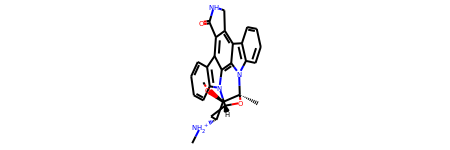

In [26]:
klifs.remote.coordinates.ligand.mol2_to_rdkit_mol(33)
#from rdkit.Chem import AllChem
#AllChem.Compute2DCoords(mol)

## Local data

### Initialize

In [27]:
# Add test files and update paths
klifs_overview_path = '/home/dominique/Documents/Work/Projects/KFFL/KLIFS_download/overview.csv'
klifs_export_path = '/home/dominique/Documents/Work/Projects/KFFL/KLIFS_download/KLIFS_export.csv'

In [28]:
klifs.local.initialize.from_files(
    klifs_overview_path=klifs_overview_path,
    klifs_export_path=klifs_export_path
).head()

,species,kinase,pdb_id,alternate_model,chain,ligand_orthosteric_pdb_id,ligand_allosteric_pdb_id,rmsd1,rmsd2,qualityscore,...,bp_iv,bp_v,kinase_all,family,groups,ligand_orthosteric_name,ligand_allosteric_name,dfg,ac_helix,filepath
0,Human,ABL1,4twp,-,B,AXI,-,0.781,2.138,8.0,...,0,0,[ABL1],Abl,TK,AXITINIB,-,in,in,HUMAN/ABL1/4twp_chainB
1,Human,ABL1,2hz4,-,B,4ST,-,0.780,1.968,6.0,...,0,0,[ABL1],Abl,TK,"1,2,3,4-TETRAHYDROGEN-STAUROSPORINE",-,in,in,HUMAN/ABL1/2hz4_chainB
2,Human,ABL1,2gqg,A,A,1N1,-,0.781,2.127,8.0,...,0,0,[ABL1],Abl,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,in,in,HUMAN/ABL1/2gqg_altA_chainA
3,Human,ABL1,2v7a,-,B,627,-,0.787,2.095,8.0,...,0,0,[ABL1],Abl,TK,N-[(3E)-5-[(2R)-2-METHOXY-2-PHENYLACETYL]PYRRO...,-,in,in,HUMAN/ABL1/2v7a_chainB
4,Human,ABL1,2gqg,B,B,1N1,-,0.784,2.113,8.0,...,0,0,[ABL1],Abl,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,in,in,HUMAN/ABL1/2gqg_altB_chainB


In [29]:
klifs_metadata_path = Path(klifs_overview_path).parent / 'klifs_metadata.csv'
klifs_metadata = pd.read_csv(klifs_metadata_path).head()

### Kinases

In [30]:
klifs.local.kinases.kinase_groups(klifs_metadata)

['TK']

In [31]:
klifs.local.kinases.kinase_families(klifs_metadata)

['Abl']

In [32]:
klifs.local.kinases.kinase_families(klifs_metadata, 'TK')

['Abl']

### Ligands

### Interactions

### Structures

### Coordinates

In [33]:
klifs_download_path = '/home/dominique/Documents/Work/Projects/KFFL/KLIFS_download'
species = 'human'
kinase_name = 'ABL1'
pdb_id = '2gqg'
alt = 'A'
chain = 'A'

In [34]:
klifs.local.coordinates.complex.mol2_to_dataframe(klifs_download_path, species, kinase_name, pdb_id, alt, chain).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,24.7648,40.4121,42.0300,N.4,1,GLY223,1.0,BACKBONE
1,2,H1,25.5317,40.5949,42.6613,H,1,GLY223,0.0,BACKBONE


In [35]:
klifs.local.coordinates.protein.mol2_to_dataframe(klifs_download_path, species, kinase_name, pdb_id, alt, chain).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,24.7648,40.4121,42.0300,N.4,1,GLY223,1.0,BACKBONE
1,2,H1,25.5317,40.5949,42.6613,H,1,GLY223,0.0,BACKBONE


In [36]:
klifs.local.coordinates.pocket.mol2_to_dataframe(klifs_download_path, species, kinase_name, pdb_id, alt, chain).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,6.0411,17.4421,54.1585,N.3,1,HIS246,0.0,BACKBONE
1,2,H,5.3272,18.0162,54.5837,H,1,HIS246,0.0,BACKBONE


In [37]:
klifs.local.coordinates.water.mol2_to_dataframe(klifs_download_path, species, kinase_name, pdb_id, alt, chain).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,O,-4.8523,29.627,38.4036,O.3,1,HOH,0.0
1,2,H1,-3.8923,29.627,38.4036,H,1,HOH,0.0


In [38]:
klifs.local.coordinates.ligand.mol2_to_dataframe(klifs_download_path, species, kinase_name, pdb_id, alt, chain).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,C1,0.1585,21.0324,42.7575,C.2,1,Q1N1,0.0772
1,2,H1,0.1096,22.0261,42.3371,H,1,Q1N1,0.1500


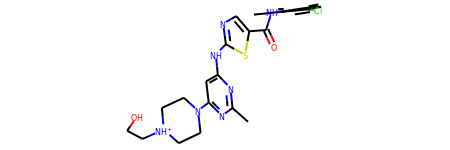

In [39]:
klifs.local.coordinates.ligand.mol2_to_rdkit_mol(klifs_download_path, species, kinase_name, pdb_id, alt, chain)